In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [3]:
df1=pd.read_csv('D:/pythonCode/projects/youtube-adview-prediction/train.csv')

###EDA

In [4]:
df1.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,D


In [5]:
df1.tail(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
14989,VID_20638,22,1204587,10284,379,2016,10-04-2013,PT10H19S,G
14990,VID_11386,15,525829,350,222,F,08-07-2016,PT29M38S,D
14991,VID_2502,1,333336,152,84,F,11-12-2015,PT18M40S,C
14992,VID_11653,1,78021,422,19,14,12-08-2016,PT2M57S,D
14993,VID_13909,11,96816,122,9,11,30-01-2014,PT2M6S,D
14994,VID_31,2,525949,1137,83,86,18-05-2015,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,20-10-2015,PT3M56S,D
14996,VID_805,4,3479,16,1,1,23-08-2013,PT3M13S,B
14997,VID_19843,1,963,0,0,0,02-10-2010,PT26S,G
14998,VID_8534,1,15212,22,5,4,19-02-2016,PT1M1S,D


In [6]:
df1.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [7]:
df1.dtypes.value_counts()

object    8
int64     1
dtype: int64

In [8]:
df1.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [ ]:
for i in range(len(df1['views'])):
    if df1['views'][i]=='F':
        df1['views'][i]=0

In [10]:
df1['views']=df1['views'].astype(np.int64)


In [ ]:
for i in range(len(df1['likes'])):
    if df1['likes'][i]=='F':
        df1['likes'][i]=0 
        

In [12]:
df1['likes']=df1['likes'].astype(np.int64)

In [ ]:
for i in range(len(df1['dislikes'])):
    if df1['dislikes'][i]=='F':
        df1['dislikes'][i]=0 

In [14]:
df1['dislikes']=df1['dislikes'].astype(np.int64)

In [ ]:
for i in range(len(df1['comment'])):
    if df1['comment'][i]=='F':
        df1['comment'][i]=0 

In [16]:
df1['comment']=df1['comment'].astype(np.int64)

In [17]:
df1.dtypes


vidid        object
adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category     object
dtype: object

In [27]:
df1.describe()

,adview,views,likes,dislikes,comment
count,1.499900e+04,1.499900e+04,14999.000000,14999.000000,14999.000000
mean,2.107791e+03,7.134752e+05,2739.423428,253.969065,400.174145
std,5.237711e+04,2.724531e+06,8851.481213,1023.209567,1494.345713
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000e+00,3.120100e+04,83.000000,7.000000,7.000000
50%,2.000000e+00,1.583170e+05,434.000000,37.000000,43.000000
75%,6.000000e+00,5.846100e+05,1815.500000,166.000000,215.000000
max,5.429665e+06,1.380479e+08,283824.000000,49449.000000,75045.000000


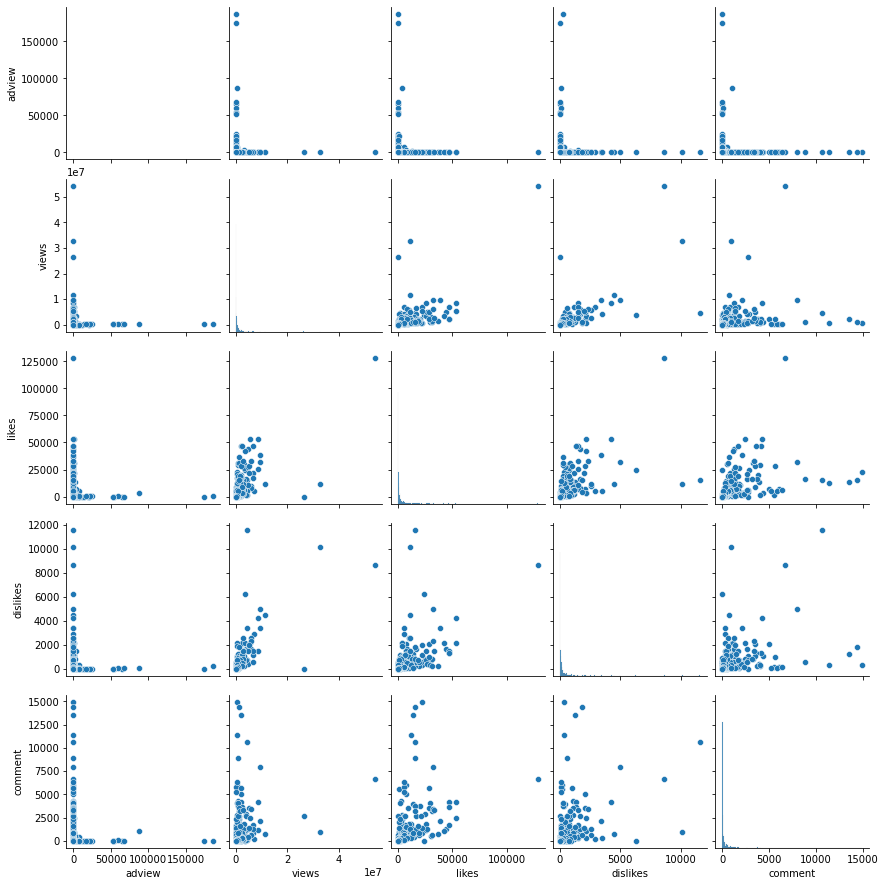

In [22]:
pairp=sns.pairplot(df1.sample(1000))

In [23]:
pairp.savefig('D:/pythonCode/projects/youtube-adview-prediction/pairplot.png')

In [25]:
df1.corr()

,adview,views,likes,dislikes,comment
adview,1.000000,0.032054,0.044040,0.035852,0.015801
views,0.032054,1.000000,0.719122,0.723686,0.408631
likes,0.044040,0.719122,1.000000,0.648235,0.650171
dislikes,0.035852,0.723686,0.648235,1.000000,0.528888
comment,0.015801,0.408631,0.650171,0.528888,1.000000


#encoding categoricl values

In [34]:
cate={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7}

In [35]:
for i in range(len(df1['category'])):
    df1['category'][i]=cate[df1['category'][i]]

C:\Users\Chara\AppData\Local\Temp/ipykernel_15312/2655812318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['category'][i]=cate[df1['category'][i]]


In [36]:
df1.sample(30)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
4335,VID_13462,1,6893,36,10,31,16-02-2014,PT3M11S,3
13419,VID_20513,1,81770,480,9,18,27-03-2015,PT2M46S,6
5633,VID_19710,1,203855,726,16,151,25-12-2015,PT4M24S,6
2350,VID_18377,2,608078,7760,140,483,11-09-2016,PT8M43S,5
4421,VID_872,2,16287,34,12,2,12-06-2013,PT4M40S,1
1912,VID_8480,2,144072,40,17,5,24-01-2014,PT2M34S,3
3411,VID_17194,2,175676,1235,58,743,27-02-2016,PT5M7S,4
8051,VID_1452,16,628077,10087,75,1924,03-09-2016,PT1M32S,1
14890,VID_21267,1,42998,85,12,12,23-02-2013,PT3M38S,6
2921,VID_10383,1,466553,1607,235,210,13-02-2017,PT38M1S,3


In [40]:
df1['category']=df1['category'].astype(int)

In [41]:
df1.dtypes

vidid        object
adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int32
dtype: object

In [49]:
import datetime
import time

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
       mm+=i
    else:
      if(i=='H'):
        h = mm
        mm = ''
      elif(i=='M'):
        m = mm
        mm = ''
      else:
        s =mm
        mm = ''
  if(h==''):
    h = '00'
  if(m==''):
    m = '00'
  if(s==''):
    s = '00'
  bp=h+':'+m+':'+s
  return bp


def func_sec(time_string):
  h,m,s=time_string.split(':')
  return int(h)*3600+int(m)*60+int(s)



In [50]:
df1['duration']=df1['duration'].apply(checki)
df1['duration']=df1['duration'].apply(func_sec)


In [54]:
df1.drop(['vidid'],inplace=True,axis=1)

In [55]:
df1.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,14-09-2016,457,5
1,2,1707,56,2,6,01-10-2016,570,3
2,1,2023,25,0,2,02-07-2016,136,2
3,6,620860,777,161,153,27-07-2016,262,7
4,1,666,1,0,0,29-06-2016,31,3


In [59]:
label_encoder = LabelEncoder()  # LabelEncoder is used to convert string labels into numbers.
df1['published']=label_encoder.fit_transform(df1['published'])

In [64]:
df1.to_csv('D:/pythonCode/projects/youtube-adview-prediction/train_new.csv')

In [94]:
df1=pd.read_csv('D:/pythonCode/projects/youtube-adview-prediction/train_new.csv')

In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [95]:
y=pd.DataFrame()
y['adviews']=df1['adview']

In [97]:
df1.drop(['Unnamed: 0'],inplace=True,axis=1)

In [98]:
df1.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,1090,457,5
1,2,1707,56,2,6,64,570,3
2,1,2023,25,0,2,122,136,2
3,6,620860,777,161,153,2090,262,7
4,1,666,1,0,0,2235,31,3


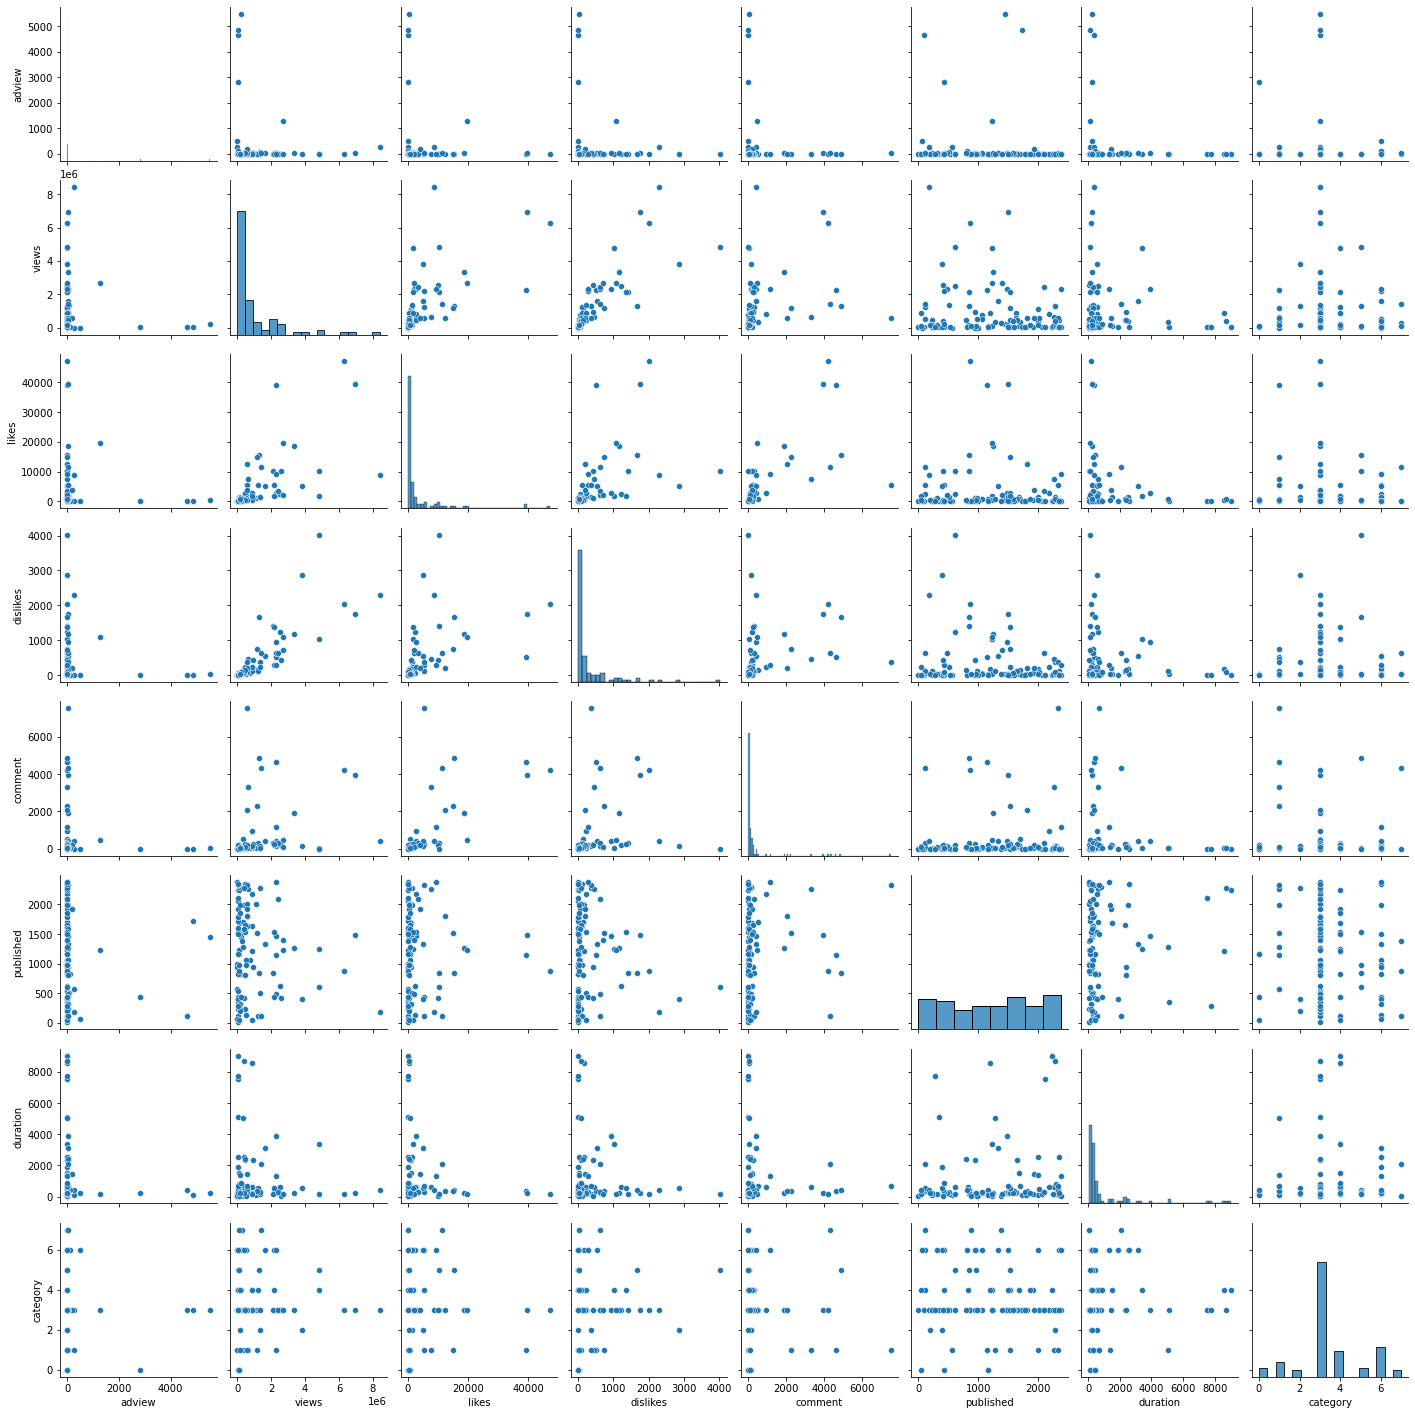

In [99]:
pairplot=sns.pairplot(df1.sample(100,random_state=0))

In [100]:
df1.describe()

,adview,views,likes,dislikes,comment,published,duration,category
count,1.499900e+04,1.499900e+04,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,2.107791e+03,7.134752e+05,2739.423428,253.969065,400.174145,1211.792386,1045.884059,3.604574
std,5.237711e+04,2.724531e+06,8851.481213,1023.209567,1494.345713,695.575593,2313.382209,1.580268
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+00,3.120100e+04,83.000000,7.000000,7.000000,606.000000,186.000000,3.000000
50%,2.000000e+00,1.583170e+05,434.000000,37.000000,43.000000,1220.000000,325.000000,3.000000
75%,6.000000e+00,5.846100e+05,1815.500000,166.000000,215.000000,1825.000000,729.500000,5.000000
max,5.429665e+06,1.380479e+08,283824.000000,49449.000000,75045.000000,2385.000000,42317.000000,7.000000


In [101]:
df1.corr()

,adview,views,likes,dislikes,comment,published,duration,category
adview,1.000000,0.032054,0.044040,0.035852,0.015801,0.001414,-0.013359,0.007641
views,0.032054,1.000000,0.719122,0.723686,0.408631,-0.007364,0.005878,0.034346
likes,0.044040,0.719122,1.000000,0.648235,0.650171,-0.007298,-0.043008,-0.007563
dislikes,0.035852,0.723686,0.648235,1.000000,0.528888,-0.010060,0.000532,0.011880
comment,0.015801,0.408631,0.650171,0.528888,1.000000,0.002114,-0.037151,-0.032638
published,0.001414,-0.007364,-0.007298,-0.010060,0.002114,1.000000,-0.008154,0.008599
duration,-0.013359,0.005878,-0.043008,0.000532,-0.037151,-0.008154,1.000000,0.050779
category,0.007641,0.034346,-0.007563,0.011880,-0.032638,0.008599,0.050779,1.000000


In [102]:
df1.drop(['adview'],inplace=True,axis=1)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = 0.2, random_state=42)

In [105]:
X_train.shape

(11999, 7)

In [104]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
